/Users/paullucaci/Desktop/P20
/Users/paullucaci/Desktop/P20/DeepSarsa


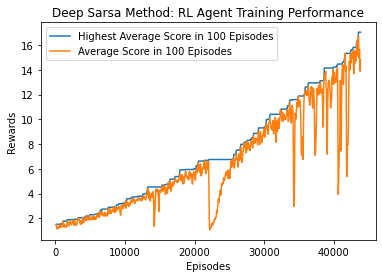

,episode,frame,highest_score,rolling_reward
43400,43400,15694999,16.31,15.12
43450,43450,15727436,16.31,15.23
43500,43500,15762559,16.31,15.83
43550,43550,15798219,17.03,16.73
43600,43600,15829304,17.03,15.78
43650,43650,15861508,17.03,14.93
43700,43700,15895504,17.03,15.62
43750,43750,15924595,17.03,14.70
43800,43800,15955345,17.03,13.88
43850,43850,15988301,17.03,14.80


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

import matplotlib.pyplot as plt
import pandas as pd

%cd /content/drive/MyDrive/P20/
from notebook_plotter import training_plots

%cd /content/drive/MyDrive/P20/DeepSarsa/
metrics_filename='./metrics/torch-deepsarsa-metrics_breakout.pkl'

training_plots(metrics_filename=metrics_filename, title="Deep Sarsa Method: RL Agent Training Performance").tail(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/P20/DeepSarsa/

!pip install baselines --no-deps
!pip install gym["atari"]
!python -m atari_py.import_roms "./Atari-Roms"

import sys, os

/data/workspace_files/DeepSarsa
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /opt/python/envs/default/lib/python3.8/site-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Air Raid (PAL).bin to /opt/python/envs/default/lib/python3.8/site-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Alien.bin to /opt/python/envs/default/lib/python3.8/site-packages/atari_py/atari_roms/alien.bin
copying crazy_climber.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Crazy Climber.bin to /opt/python/envs/default/lib/python3.8/site-packages/atari_py/atari_roms/crazy_climber.bin
copying elevator_action.bin from HC R

In [ ]:
import torch
import torch.nn as nn

%cd /content/drive/MyDrive/P20/DeepSarsa/

from p20 import training_p20
from baselines.common.atari_wrappers import make_atari, wrap_deepmind
import gym

global device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Adapted from https://github.com/mila-iqia/atari-representation-learning/blob/08165740a7688853c6315751003aa4dee9901073/README.md#L125
class BaseEncoder(nn.Module):
    # Network defined by the Deepmind paper (Mnih, et al., 2015)
    def __init__(self, num_actions=4):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(4, 32, 8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=3136, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=num_actions)
        )

    def forward(self, inputs):
        x = self.cnn(inputs)
        x = x.view(x.size(0), -1)
        return x

def main(game_name, seed):

    env = wrap_deepmind(make_atari(game_name), episode_life=False, frame_stack=True, scale=True)
    env.seed(seed)

    p20_model = BaseEncoder(env.action_space.n).to(device)
    p20_model.train()

    training_p20(env=env, seed=seed, solved_at=40, p20_model=p20_model,
                    max_episodes=60000, lr=0.00025, gamma=0.99, max_epsilon=1, min_epsilon=0.1, render=False,
                    metrics_filename='./metrics/torch-deepsarsa-metrics_breakout.pkl',
                    checkpoint_filename='./checkpoints/torch-deepsarsa-checkpoint_breakout.pkl',
                    theta_filename='torch-deepsarsa_breakout.pt')

if __name__ == "__main__":
    main(game_name="BreakoutNoFrameskip-v4", seed=42)

/data/workspace_files/DeepSarsa

Using previously collected metrics during training:
                    100       150       200       250       300       350  \
episode           100.0    150.00    200.00    250.00    300.00    350.00   
frame           19421.0  28031.00  36957.00  46178.00  55161.00  64679.00   
highest_score       1.5      1.51      1.51      1.51      1.51      1.51   
rolling_reward      1.5      1.36      1.14      1.23      1.24      1.29   

                     400       450       500        550  ...        41950  \
episode           400.00    450.00    500.00     550.00  ...     41950.00   
frame           73352.00  82901.00  92043.00  101357.00  ...  14795187.00   
highest_score       1.51      1.51      1.51       1.51  ...        15.32   
rolling_reward      1.19      1.21      1.33       1.31  ...         7.22   

                      42000        42050        42100        42150  \
episode            42000.00     42050.00     42100.00     42150.00   
fra

KeyboardInterrupt: KeyboardInterrupt: 

In [ ]:
while True: pass